In [1]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
collist=['TPERIOD','TDUR','DRRATIO','NTRANS','TSNR','TDEPTH','INDUR',
         'SESMES_LOG_RATIO','PRAD_LOG_RATIO','TDUR_LOG_RATIO','RADRATIO','IMPACT',
         'TESSMAG','RADIUS','PMTOTAL','LOGG','MH','TEFF']

In [8]:
allcols=np.zeros(len(collist))

In [24]:
for info in glob.glob('/home/hosborn/TESS/processed_dvpdc_101/all/*info.pickle')[:3]:
    data=pickle.load(open(info,'rb'),encoding='latin1')
    dataout=np.array([data[c] for c in collist]).astype(float)

In [22]:
meds={collist[n]:np.nanmedian(allcols[:,n],axis=0) for n in range(len(collist))}
stds={collist[n]:np.nanstd(allcols[:,n],axis=0) for n in range(len(collist))}

In [34]:
for info in glob.glob('/home/hosborn/TESS/processed_dvpdc_101/all/*info.pickle'):
    data=pickle.load(open(info,'rb'),encoding='latin1')
    newdic={c+'_W':(data[c]-meds[c])/stds[c] for c in collist}
    data.update(newdic)
    pickle.dump(data,open(info,'wb'))

In [23]:
print(meds)
print(stds)

{'MH': -0.17648201, 'LOGG': 4.33676004, 'TPERIOD': 9.355533969908725, 'TDUR_LOG_RATIO': 9.596847154576566e-05, 'PMTOTAL': 41.750360515, 'IMPACT': 0.4975551392169113, 'TSNR': 17.94325828552246, 'SESMES_LOG_RATIO': 0.14966165259175565, 'RADIUS': 1.19562995, 'TESSMAG': 9.46700001, 'PRAD_LOG_RATIO': -0.22812650448387642, 'DRRATIO': 10.623160359481897, 'TEFF': 5696.0, 'INDUR': 0.4041811547386961, 'TDEPTH': 2498.4787689028462, 'NTRANS': 3.0, 'TDUR': 4.569871799433878, 'RADRATIO': 0.049454654513043816}
{'MH': 0.33468353151252145, 'LOGG': 0.6101576052972555, 'TPERIOD': 18.25861477337735, 'TDUR_LOG_RATIO': 0.11754621993540083, 'PMTOTAL': 107.80837125574534, 'IMPACT': 0.4045386245598444, 'TSNR': 289.0890599108683, 'SESMES_LOG_RATIO': 0.2480746146733351, 'RADIUS': 2.7204078591808596, 'TESSMAG': 1.7655596983478106, 'PRAD_LOG_RATIO': 0.47797558292519715, 'DRRATIO': 31.587690765961458, 'TEFF': 1771.3366207018846, 'INDUR': 2.086855821487322, 'TDEPTH': 81227.09033526565, 'NTRANS': 23.267758198609776, 

In [14]:
import seaborn as sns

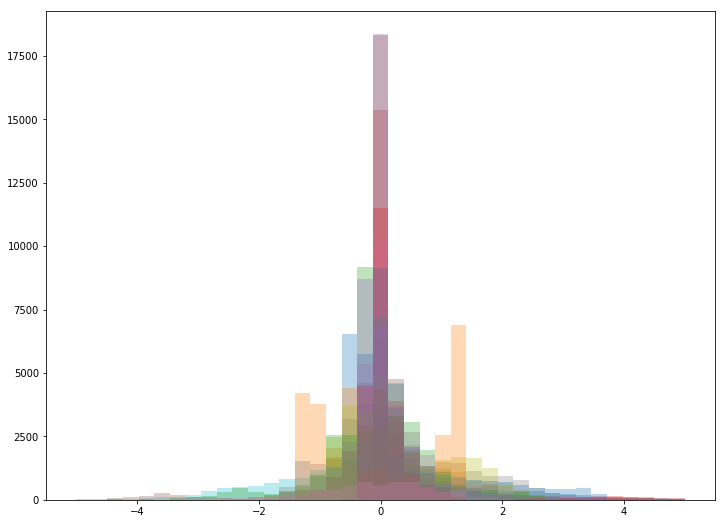

In [20]:
plt.figure(figsize=(12,9))
for n in range(len(collist)):
    plt.hist((allcols[:,n]-meds[n])/stds[n],bins=np.linspace(-5,5,40),alpha=0.3)

In [35]:
testcols=np.zeros(len(collist))
for info in glob.glob('/home/hosborn/TESS/processed_dvpdc_101/all/*info.pickle'):
    data=pickle.load(open(info,'rb'),encoding='latin1')
    testcols=np.vstack((testcols,np.array([data[c] for c in collist]).astype(float)))
    

for info in glob.glob('/home/hosborn/TESS/processed_dvpdc_101/all/*info.pickle'):
    data=pickle.load(open(info,'rb'),encoding='latin1')
    newdic={c+'_W':(data[c]-meds[c])/stds[c] for c in collist}
    data.update(newdic)
    pickle.dump(data,open(info,'wb'))
    
    
    
meds={collist[n]:np.nanmedian(testcols[:,n],axis=0) for n in range(len(collist))}
stds={collist[n]:np.nanstd(testcols[:,n],axis=0) for n in range(len(collist))}


for info in glob.glob('/home/hosborn/TESS/processed_dvpdc_101/test/*info.pickle'):
    data=pickle.load(open(info,'rb'),encoding='latin1')
    newdic={c+'_W':(data[c]-meds[c])/stds[c] for c in collist}
    data.update(newdic)
    pickle.dump(data,open(info,'wb'))

In [37]:
print(meds)
print(stds)

{'MH': -0.17648201, 'LOGG': 4.33676004, 'TPERIOD': 9.355533969908725, 'TDUR_LOG_RATIO': 9.596847154576566e-05, 'PMTOTAL': 41.750360515, 'IMPACT': 0.4975551392169113, 'TSNR': 17.94325828552246, 'SESMES_LOG_RATIO': 0.14966165259175565, 'RADIUS': 1.19562995, 'TESSMAG': 9.46700001, 'PRAD_LOG_RATIO': -0.22812650448387642, 'DRRATIO': 10.623160359481897, 'TEFF': 5696.0, 'INDUR': 0.4041811547386961, 'TDEPTH': 2498.4787689028462, 'NTRANS': 3.0, 'TDUR': 4.569871799433878, 'RADRATIO': 0.049454654513043816}
{'MH': 0.33468353151252145, 'LOGG': 0.6101576052972555, 'TPERIOD': 18.25861477337735, 'TDUR_LOG_RATIO': 0.11754621993540083, 'PMTOTAL': 107.80837125574534, 'IMPACT': 0.4045386245598444, 'TSNR': 289.0890599108683, 'SESMES_LOG_RATIO': 0.2480746146733351, 'RADIUS': 2.7204078591808596, 'TESSMAG': 1.7655596983478106, 'PRAD_LOG_RATIO': 0.47797558292519715, 'DRRATIO': 31.587690765961458, 'TEFF': 1771.3366207018846, 'INDUR': 2.086855821487322, 'TDEPTH': 81227.09033526565, 'NTRANS': 23.267758198609776, 

In [40]:
testcols

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 7.00918675e+00,  1.02963505e+00,  5.09868233e+01, ...,
         4.38145018e+00, -1.59192000e-02,  6.11525977e+03],
       [ 1.92643935e+01,  1.08986101e+01,  1.39822671e+01, ...,
         4.07000017e+00, -3.00000000e-02,  5.99360010e+03],
       ...,
       [ 1.24296056e+00,  1.65209306e+00,  3.87595333e+00, ...,
         4.35410023e+00,             nan,  4.81400000e+03],
       [ 1.27197166e+01,  4.46753424e+00,  1.61009365e+01, ...,
         4.83058023e+00,             nan,  3.44500000e+03],
       [ 4.02773365e+01,  7.46848735e+00,  3.73561925e+01, ...,
         2.04771996e+00,             nan,  4.56000000e+03]])

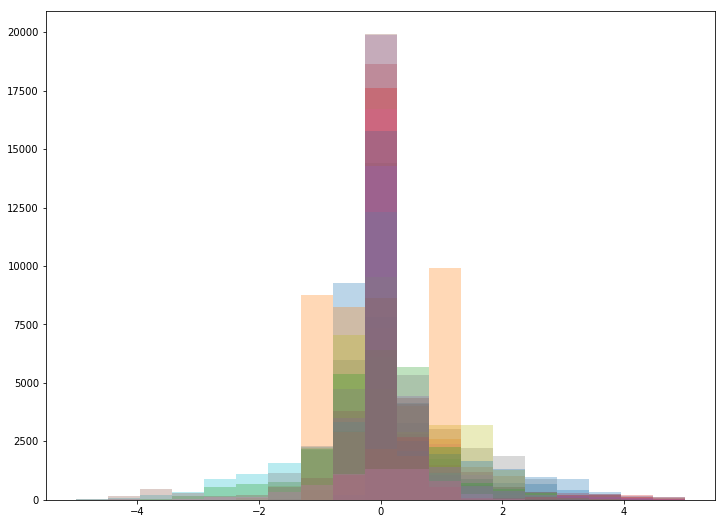

In [45]:
plt.figure(figsize=(12,9))
for n in range(len(collist)):
    plt.hist((testcols[:,n]-meds[collist[n]])/stds[collist[n]],bins=np.linspace(-5,5,20),alpha=0.3)

In [46]:
for info in glob.glob('/home/hosborn/TESS/processed_dvpdc_101/test/*info.pickle'):
    data=pickle.load(open(info,'rb'),encoding='latin1')
    newdic={c+'_W':(data[c]-meds[c])/stds[c] for c in collist}
    data.update(newdic)
    pickle.dump(data,open(info,'wb'))

# Removing near-infinite LC points:

/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in greater
  
/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  
/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in less
  """


In [67]:
np.sum(np.array(globinfs)>0)

168

In [69]:
data[1,1]=np.nan

In [71]:
NRINF=~np.isnan(data)*((data>1)+(data<-1))

/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [49]:
data=np.load('/home/hosborn/TESS/processed_dvpdc_101/all/000167363521_03_04_view_loc.npy')

In [76]:
NRINF=np.isnan(data)+(data>1)+(data<-1)

/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/home/hosborn/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [58]:
NRINF.sum()

3

In [60]:
data[NRINF]=np.nan

In [61]:
data

array([[ 2.35229339e-02,  1.67654012e-02],
       [ 4.67183013e-02,  3.77330456e-02],
       [-2.92933274e-03, -2.45240901e-01],
       [ 4.34081903e-03,  2.17483462e-02],
       [-1.64154196e-02,  1.11752144e-01],
       [ 5.84770474e-03,  5.13843933e-03],
       [-3.66822537e-03,  1.73795951e-02],
       [ 1.67423033e-02,  1.13351592e-01],
       [-9.85116178e-03, -1.55513273e-01],
       [ 1.12358136e-02,  5.84541623e-02],
       [-6.64946871e-03,  1.07553549e-01],
       [-1.27910478e-02, -1.53749792e-01],
       [-3.53582093e-04,  2.06036149e-02],
       [ 3.79761178e-03,  9.35465684e-02],
       [ 4.64764683e-02, -1.37958488e-01],
       [ 3.32037840e-02, -6.25012432e-02],
       [ 6.80979118e-03,  7.09349812e-02],
       [-1.73743904e-02,  2.62315619e-02],
       [ 1.92915395e-02, -5.03757208e-04],
       [-1.72371127e-02,  7.15369255e-02],
       [-1.57998824e-02, -7.13864013e-02],
       [ 3.25580025e-02,  6.84907037e-04],
       [ 1.61162866e-02,  8.35248186e-02],
       [-5.

In [51]:
data[(data>1e3)+(data<-1e3)]=np.nan

In [52]:
data

array([[ 2.35229339e-02,  1.67654012e-02],
       [ 4.67183013e-02,  3.77330456e-02],
       [-2.92933274e-03, -2.45240901e-01],
       [ 4.34081903e-03,  2.17483462e-02],
       [-1.64154196e-02,  1.11752144e-01],
       [ 5.84770474e-03,  5.13843933e-03],
       [-3.66822537e-03,  1.73795951e-02],
       [ 1.67423033e-02,  1.13351592e-01],
       [-9.85116178e-03, -1.55513273e-01],
       [ 1.12358136e-02,  5.84541623e-02],
       [-6.64946871e-03,  1.07553549e-01],
       [-1.27910478e-02, -1.53749792e-01],
       [-3.53582093e-04,  2.06036149e-02],
       [ 3.79761178e-03,  9.35465684e-02],
       [ 4.64764683e-02, -1.37958488e-01],
       [ 3.32037840e-02, -6.25012432e-02],
       [ 6.80979118e-03,  7.09349812e-02],
       [-1.73743904e-02,  2.62315619e-02],
       [ 1.92915395e-02, -5.03757208e-04],
       [-1.72371127e-02,  7.15369255e-02],
       [-1.57998824e-02, -7.13864013e-02],
       [ 3.25580025e-02,  6.84907037e-04],
       [ 1.61162866e-02,  8.35248186e-02],
       [-5.

In [9]:
collist=['TPERIOD','TDUR','DRRATIO','NTRANS','TSNR','TDEPTH','INDUR',
         'SESMES_LOG_RATIO','PRAD_LOG_RATIO','TDUR_LOG_RATIO','RADRATIO','IMPACT',
         'TESSMAG','RADIUS','PMTOTAL','LOGG','MH','TEFF']


In [10]:
import os
import pickle
import numpy as np
import glob

infos=glob.glob('/home/hosborn/TESS/processed_dv_101_centfixed2/test/*info.npy')
for file in infos:
    info=np.load(file,encoding='latin1')
    fall=file.replace('processed_dv_101_centfixed2','processed_dvpdc_both').replace('_info.npy','_view_info.pickle')
    if os.path.exists(fall):
        info2=pickle.load(open(fall,'rb'),encoding='latin1')
    elif os.path.exists(fall.replace('test','all')):
        info2=pickle.load(open(fall.replace('test','all'),'rb'),encoding='latin1')
    elif os.path.exists(fall.replace('test','nans')):
        info2=pickle.load(open(fall.replace('test','nans'),'rb'),encoding='latin1')
    else:
        print("NO PICKLES FOR YOU - ",fall)
        info2=None
    if info2 is not None:
        if info[6]!=info2['tce_label']:
            print("LABEL CLASH - ",info[6],info2['tce_label'])
        newinfo=np.hstack((info,np.array([info2[col+'_W'] for col in collist])))
        np.save(file.replace('.npy','2.npy'),newinfo)

In [ ]:
import os
import pickle
import numpy as np
import glob

infos=glob.glob('/home/hosborn/TESS/processed_dv_101_centfixed2/test/*info.npy')
for file in infos:
    info=np.load(file,encoding='latin1')
    fall=file.replace('processed_dv_101_centfixed2','processed_dvpdc_both').replace('_info.npy','_view_info.pickle')
    if os.path.exists(fall):
        info2=pickle.load(open(fall,'rb'),encoding='latin1')
    elif os.path.exists(fall.replace('test','all')):
        info2=pickle.load(open(fall.replace('test','all'),'rb'),encoding='latin1')
    elif os.path.exists(fall.replace('test','nans')):
        info2=pickle.load(open(fall.replace('test','nans'),'rb'),encoding='latin1')
    else:
        print("NO PICKLES FOR YOU - ",fall)
        info2=None
    if info2 is not None:
        if info[6]!=info2['tce_label']:
            print("LABEL CLASH - ",info[6],info2['tce_label'])
        newinfo=np.hstack((info,np.array([info2[col+'_W'] for col in collist])))
        np.save(file.replace('.npy','2.npy'),newinfo)

In [7]:
os.path.exists('/home/hosborn/TESS/processed_dvpdc_both/test/000010803257_00_04_view_info.pickle')

False

In [11]:
len(glob.glob('/home/hosborn/TESS/processed_dv_101_centfixed2/test/*info2.npy'))

2358

In [12]:
len(glob.glob('/home/hosborn/TESS/processed_dv_101_centfixed2/test/*info.npy'))

2358

In [5]:
colstring='kepid,tce_period,tce_time0bk,tce_duration,tce_depth,tce_plnt_num,tce_label,log10Metallicity,log10SurfaceGravity,effectiveTemp,allTransitsFit_starRadiusSolarRadii,allTransitsFit_starDensitySolarDensity,decDegrees,raDegrees,pmRa,pmDec,tessMag,det_MES,exp_MES,sector,label_complex,old_tce_label'
#"OLD":
label=6
np.array(colstring.split(','))[7:13]


array(['log10Metallicity', 'log10SurfaceGravity', 'effectiveTemp',
       'allTransitsFit_starRadiusSolarRadii',
       'allTransitsFit_starDensitySolarDensity', 'decDegrees'],
      dtype='<U38')

In [4]:
np.load(glob.glob('/home/hosborn/TESS/processed_dv_101_centfixed2/test/*info.npy')[0],encoding='latin1')

array([10803257, 0.6240309, 1396.2104166666604, 1.9420274045735253,
       18925.71538601691, 0, 'BEB', 0.3, 4.58, 5486.0, 0.970712, 1.03597,
       -7.2447089999999985, 20.29599, 140.595, 69.328, 10.359000000000002,
       132.1849, nan, 'sector-4', 'BEB', 'BEB'], dtype=object)

In [12]:
info2=np.load(glob.glob('/home/hosborn/TESS/Processed_RealDat_2/*info.npy')[0],encoding='latin1')
newixs=np.array([16, 24, 17, 30, 31, 21])
info2[newixs]

array([nan, 4.33392, 5448.0, 1.09989, 0.714733, -69.314913], dtype=object)

In [9]:
newinfo=[u'MAXMES', u'MAXSES', u'TDEPTH', u'TDUR', u'TEPOCH', u'TPERIOD', u'TSNR', u'n_det', u'rmsCdpp', u'sector', u'sectors', u'is_toi', u'toi',
         u'toi_disp', u'TID', u'ID', u'MH', u'Teff', u'Tmag', u'contratio', u'd',
         u'dec', u'gallat', u'gallong', u'logg', u'mass', u'objType', u'pmDEC',
         u'pmRA', u'ra', u'rad', u'rho']


In [10]:
newixs=np.array([newinfo.index(c) for c in ['MH','logg','Teff','rad','rho','dec']])

array([16, 24, 17, 30, 31, 21])